<a href="https://colab.research.google.com/github/AiDAPT-A/2024-Q3-ai-in-architecture/blob/aerial/3_Tutorial_Beyond_Boundaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beyond boundaries: Building aerial image collection and representation

You will gain comprehensive skills in aerial image collection, GIS, image processing, and foundational machine learning concepts, applicable in fields like environmental monitoring, urban planning, and spatial analysis.

<!-- ![add "motivational" figure of tutorial, 2:1 and a width of 750px orso ratio]() $\rightarrow$ example below. (See Teams chat for how to add images from an open folder in your or a shared Drive to a Google Collaboratory notebook.)

<center>
<img src="https://drive.google.com/uc?export=view&id=1bPb5V4pLmKfUfP77vLVVMRB2_NMLUI7Z" alt="floor-layout" class="center" width="750px">
</center> -->


## 📌 Overview
This tutorial focuses on the collection, processing, and analysis of aerial images using GIS and foundation models in machine learning. Below are the key learning outcomes:

### 🧠 **Learning objectives**
- Extract automatically images and create a customized dataset
- Select which *building+context* representation is more informative depending on the task at hand
- Generate image embbedings from pre-trained foundation models

### 🐍 **New in Python**
- dictionaries: `dict`
- torch tensors: `torch`
- json and pickle imports/exports: `json`, `pickle`

### 📸 1. Understanding of Aerial Imagery and Sources
- **Different Sources**: Learn about aerial image sources like PDOK and Google.
- **Applications**: Understand the applications of aerial imagery in various fields.
- **GIS Technology**: Gain knowledge about GIS and its role in geographical data handling.
- **QGIS Skills**: Acquire hands-on experience with QGIS for spatial data analysis.
- **Boundary Definition**: Learn to define geographic boundaries for image collection.
- **Image Extraction**: Master the skill of extracting images automatically within set boundaries.
- **Pre-existing Datasets**: Understand the use of existing datasets.
- **Backup Strategies**: Learn the importance of having alternative plans in data collection.

### 🎨 2. Image Representation Techniques
- **Representation Methods**: Methods for representing images for analysis.
- **Foundation Models**: Learn about different machine learning models for image processing.
- **Model Functionality**: Understand the architecture and functionality of these models.
- **Embedding Creation**: Learn how to create and use embeddings for image representation.

### 🏗️ 3. Practical Application and Project Completion
- **Hands-on Project**: Engage in a practical project applying these concepts.
- **Skill Demonstration**: Demonstrate new skills in a tangible project.


# Image representation: Aerial images.
## GIS and QGIS: Layers and reference system.

You will need to install QGIS. Please follow the instructions in this [link](https://www.qgis.org/en/site/forusers/download.html).

Then, PDOK plugin needs to be activated.


1.   List item
2.   List item


...

Let's retrieve the geographical coordinates of buildings context within a specific neighborhood.

- Select and download a [GeoPandas](https://3dbag.nl/en/download) from 3D BAG.

In [5]:
import geopandas
## Loading the shape data
path_to_data = "tile_tutorial.gpkg"
tile = geopandas.read_file(path_to_data)
tile.head()

,b3_bag_bag_overlap,b3_dak_type,b3_h_maaiveld,b3_kas_warenhuis,b3_mutatie_ahn3_ahn4,b3_nodata_fractie_ahn3,b3_nodata_fractie_ahn4,b3_nodata_radius_ahn3,b3_nodata_radius_ahn4,b3_opp_buitenmuur,...,oorspronkelijkbouwjaar,status,tijdstipeindregistratielv,tijdstipinactief,tijdstipinactieflv,tijdstipnietbaglv,tijdstipregistratie,tijdstipregistratielv,voorkomenidentificatie,geometry
0,0.0,multiple horizontal,-0.403,False,False,0.000000,0.0,0.327731,0.315555,81.440002,...,1991.0,Pand in gebruik,None,None,None,None,2010-10-13T12:40:37Z,2010-10-13T13:00:55Z,1.0,"POLYGON Z ((83758.008 445974.906 -0.402, 83759..."
1,0.0,horizontal,-0.453,False,False,0.000000,0.0,0.266385,0.338315,23.670000,...,1991.0,Pand in gebruik,None,None,None,None,2010-10-13T12:39:30Z,2010-10-13T13:00:51Z,1.0,"POLYGON Z ((83744.148 445985.125 -0.452, 83744..."
2,0.0,multiple horizontal,-0.575,False,False,0.008230,0.0,0.389827,0.363091,173.889999,...,1991.0,Pand in gebruik,None,None,None,None,2020-07-09T13:05:06Z,2020-07-09T13:10:10Z,2.0,"POLYGON Z ((83749.500 445971.000 -0.574, 83748..."
3,0.0,multiple horizontal,-0.452,False,False,0.021164,0.0,0.337877,0.296668,76.410004,...,1991.0,Pand in gebruik,None,None,None,None,2010-10-13T13:10:06Z,2010-10-13T13:30:54Z,1.0,"POLYGON Z ((83749.117 445973.531 -0.451, 83750..."
4,0.0,multiple horizontal,-0.447,False,False,0.005263,0.0,0.376935,0.386116,81.400002,...,1991.0,Pand in gebruik,None,None,None,None,2010-10-13T12:40:37Z,2010-10-13T13:00:55Z,1.0,"POLYGON Z ((83753.562 445974.219 -0.446, 83755..."


<Figure size 1000x600 with 0 Axes>

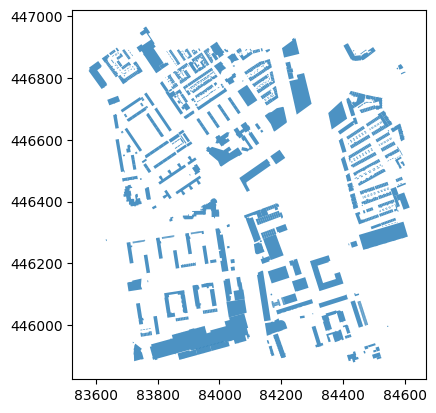

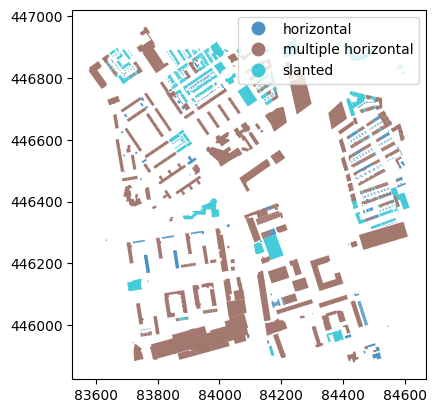

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
tile.plot(legend=True, alpha=0.8)
tile.plot(column='b3_dak_type', legend=True, alpha=0.8)

plt.show()

In [8]:
# Code snippet - from geopandas extract the coordinates into a dictionary.
import numpy as np
import json
import random

'''
get coordinates for each building and stored them in a dictionary
    - Loop over BAG IDs
    - Extract coordinates
    - Compute bounding box
    - Store results
'''

n_buildings = 50
additional_padding = 10

totaln_buildings = len(tile)
random.seed(42)
ind_build = random.sample(range(totaln_buildings), n_buildings)
# contiguous_build = range(n_buildings) # Buildings nearby

build_coord = {}
for i in ind_build:
    coord = np.array(tile.geometry.iloc[i].exterior.coords)

    coord_box = []
    coord_box.append(coord[:,0].min() - additional_padding)
    coord_box.append(coord[:,1].min() - additional_padding)
    coord_box.append(coord[:,0].max() + additional_padding)
    coord_box.append(coord[:,1].max() + additional_padding)
    build_coord[i] = coord_box

with open("build_dic.json", 'w') as file_id:
    json.dump(build_coord, file_id)

Now, we can automatically extract aerial images (or any other relevant information) through QGIS.

The following script should be run from QGIS.

Do not forget to select your directory.

Check you are storing the correct layer from `layers`

```
# Code snippet - Python code from extracting images from QGIS.

from qgis.core import *
from PyQt5.QtGui import QImage, QPainter
import qgis.utils
import json

with open("directory/build_dic.json") as file_id:
    buildings = json.load(file_id)

# configure the output image
width = 800
height = 600
dpi = 92

for build_id, coords in buildings.items():

    img = QImage(QSize(width, height), QImage.Format_RGB32)
    img.setDotsPerMeterX(dpi / 25.4 * 1000)
    img.setDotsPerMeterY(dpi / 25.4 * 1000)

    # get the map layers and extent
    layers = [layer for layer in QgsProject.instance().mapLayers().values()]
    selected_layer = [layers[2]]
    #layer = iface.activeLayer()
    extent = QgsRectangle(coords[0],
      coords[1],
      coords[2],
      coords[3])

    # configure map settings for export
    mapSettings = QgsMapSettings()
    #mapSettings.setMapUnits(0)
    mapSettings.setExtent(extent)
    mapSettings.setOutputDpi(dpi)
    mapSettings.setOutputSize(QSize(width, height))
    mapSettings.setLayers(selected_layer)
    #mapSettings.setFlags(QgsMapSettings.Antialiasing | QgsMapSettings.UseAdvancedEffects | QgsMapSettings.ForceVectorOutput | QgsMapSettings.DrawLabeling)

    # configure and run painter
    p = QPainter()
    p.begin(img)
    mapRenderer = QgsMapRendererCustomPainterJob(mapSettings, p)
    mapRenderer.start()
    mapRenderer.waitForFinished()
    p.end()
    # save the result
    path_store = "directory"
    file_name = path_store + build_id + ".png"
    img.save(file_name, "png")
```

Take a moment to cross-check the quality of the extracted images.

## Vector representation: embeddings

Info on foundation models
- DINOV2 ...

In [9]:
# Code snippet: extracting vector embeddings from a set of buildings
import torch
import os
from PIL import Image
import torchvision.transforms as T

folder_path = "aerial_images"

transform = T.Compose([
    T.Resize(256, interpolation=T.InterpolationMode.BICUBIC),
    T.CenterCrop(224),
    T.ToTensor(),
    T.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])

transformed_images = []

# list_build_images = list(range(n_buildings)) # Contiguous buildings
list_build_images = ind_build
list_build_images = [str(i) for i in list_build_images]


for img_filename in list_build_images:
    img_path = os.path.join(folder_path, img_filename + '.png')
    print(img_path)

    if os.path.isfile(img_path):
        img = Image.open(img_path)
        t_img = transform(img)
        transformed_images.append(t_img)  # Add the transformed image to the list

# Convert list of tensors to a single 4D tensor
tensor_images = torch.stack(transformed_images)

# tensor_images is now a 4D tensor of shape [N, C, H, W], where N is the number of images
print(tensor_images.shape)

aerial_images/1309.png
aerial_images/228.png
aerial_images/51.png
aerial_images/563.png
aerial_images/501.png
aerial_images/457.png
aerial_images/285.png
aerial_images/209.png
aerial_images/1116.png
aerial_images/178.png
aerial_images/1209.png
aerial_images/864.png
aerial_images/65.png
aerial_images/61.png
aerial_images/191.png
aerial_images/447.png
aerial_images/476.png
aerial_images/1034.png
aerial_images/1232.png
aerial_images/54.png
aerial_images/1149.png
aerial_images/407.png
aerial_images/1330.png
aerial_images/859.png
aerial_images/451.png
aerial_images/919.png
aerial_images/1206.png
aerial_images/569.png
aerial_images/13.png
aerial_images/326.png
aerial_images/865.png
aerial_images/696.png
aerial_images/318.png
aerial_images/440.png
aerial_images/689.png
aerial_images/189.png
aerial_images/778.png
aerial_images/198.png
aerial_images/735.png
aerial_images/704.png
aerial_images/1236.png
aerial_images/541.png
aerial_images/88.png
aerial_images/940.png
aerial_images/1098.png
aerial

All available DINOV2 models:
```
### DINOv2 pre-trained models ###
# DINOv2
dinov2_vits14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14')
dinov2_vitb14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitb14')
dinov2_vitl14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14')
dinov2_vitg14 = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitg14')

# DINOv2 with registers
dinov2_vits14_reg = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14_reg')
dinov2_vitb14_reg = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitb14_reg')
dinov2_vitl14_reg = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14_reg')
dinov2_vitg14_reg = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitg14_reg')
```

In [10]:
dinov2_vits14_reg = torch.hub.load('facebookresearch/dinov2', 'dinov2_vits14_reg')

Downloading: "https://github.com/facebookresearch/dinov2/zipball/main" to /root/.cache/torch/hub/main.zip
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:51: UserWarning: xFormers is not available (SwiGLU)
  warnings.warn("xFormers is not available (SwiGLU)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:33: UserWarning: xFormers is not available (Attention)
  warnings.warn("xFormers is not available (Attention)")
/root/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:40: UserWarning: xFormers is not available (Block)
  warnings.warn("xFormers is not available (Block)")
Downloading: "https://dl.fbaipublicfiles.com/dinov2/dinov2_vits14/dinov2_vits14_reg4_pretrain.pth" to /root/.cache/torch/hub/checkpoints/dinov2_vits14_reg4_pretrain.pth
100%|██████████| 84.2M/84.2M [00:00<00:00, 158MB/s]


In [11]:
with torch.no_grad():
    tile_embed = dinov2_vits14_reg(tensor_images)

print(tile_embed.shape)

torch.Size([50, 384])


In [12]:
torch.save(tile_embed, 'tile_embeddings.pt')
#loaded_embedding = torch.load('embeddings.pt')

### Compute Euclidean distances

In [13]:
# Define the function to compute pairwise Euclidean distances
def pairwise_euclidean_distance(x):
    num_samples = x.size(0)
    distances = torch.zeros((num_samples, num_samples))

    for i in range(num_samples):
        for j in range(num_samples):
            # Compute the Euclidean distance between x[i] and x[j]
            distances[i, j] = torch.sqrt(torch.sum((x[i] - x[j]) ** 2))

    return distances

### Compute the distance between images and embeddings

In [14]:
distance_tile = pairwise_euclidean_distance(tile_embed)

In [15]:
flattened_tile_images = tensor_images.view(tensor_images.size(0), -1) # Flatten the images
distance_tile_images = pairwise_euclidean_distance(flattened_tile_images)

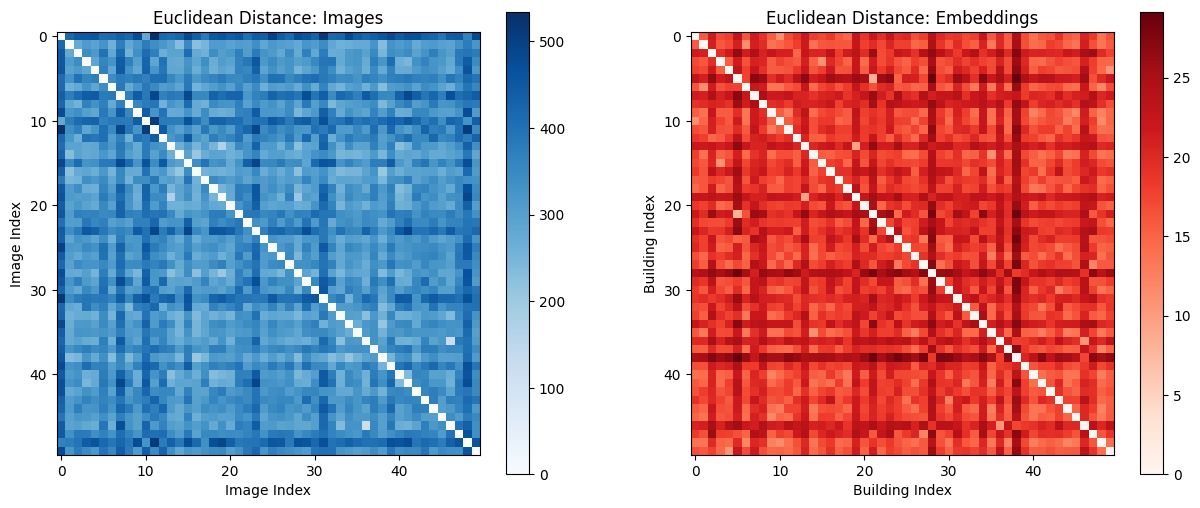

In [16]:
# Plot the distance matrix
figs, axs = plt.subplots(1, 2, figsize=(15, 6))

im1 = axs[0].imshow(distance_tile_images, interpolation='nearest', cmap='Blues')
figs.colorbar(im1, ax=axs[0])
axs[0].set_title('Euclidean Distance: Images')
axs[0].set_xlabel('Image Index')
axs[0].set_ylabel('Image Index')

im2 = axs[1].imshow(distance_tile, interpolation='nearest', cmap='Reds')
figs.colorbar(im2, ax=axs[1])
axs[1].set_title('Euclidean Distance: Embeddings')
axs[1].set_xlabel('Building Index')
axs[1].set_ylabel('Building Index')

# plt.tight_layout()
plt.show()

### Find and explore the most (dis)similar buildings

In [17]:
def get_similar_building(distance_tensor, building_index):

    # Create a mask for elements greater than 0
    mask = distance_tensor > 0

    # Apply the mask and find indices of the valid elements
    valid_indices = mask.nonzero(as_tuple=True)

    # Extract the valid elements based on the mask
    valid_values = distance_tensor[valid_indices]

    # Check if we have any valid elements to avoid runtime errors
    if len(valid_values) > 0:
        # Find the max and min values among valid elements
        max_value = valid_values.max()
        min_value = valid_values.min()

        # Find the indices in the original tensor for max and min
        max_value_index = valid_indices[0][valid_values.argmax()], valid_indices[1][valid_values.argmax()]
        min_value_index = valid_indices[0][valid_values.argmin()], valid_indices[1][valid_values.argmin()]

        # Retrive the building image based on the index
        not_similar_index = [building_index[max_value_index[0].item()], building_index[max_value_index[1].item()]]
        similar_index =  [building_index[min_value_index[0].item()], building_index[min_value_index[1].item()]]

        print(f"Maximum value > 0: {max_value.item()}, Index: {not_similar_index}")
        print(f"Minimum value > 0: {min_value.item()}, Index: {similar_index}")

    return max_value_index, min_value_index

In [19]:
get_similar_building(distance_tile_images, ind_build)

Maximum value > 0: 533.6051025390625, Index: [1309, 864]
Minimum value > 0: 118.46698760986328, Index: [778, 775]


((tensor(0), tensor(11)), (tensor(36), tensor(46)))

In [18]:
get_similar_building(distance_tile, ind_build)

Maximum value > 0: 29.10446548461914, Index: [457, 735]
Minimum value > 0: 8.177051544189453, Index: [457, 407]


((tensor(5), tensor(38)), (tensor(5), tensor(21)))

## In your opinion, which representation makes qualitatively more sense?

# Assignment: Geographical distance and distance among building embeddings are correlated?

1. Compute the embeddings for all images in the gallery
2. Extract the aerial image from your *query* building
3. Compute the embedding for your *query* buiding
4. Calculate the Euclidean distance from your *query* buiding to all buildings in the gallery
5. Calulate the  Euclidean distance with respect to the geographical coordinates provided to you in the dictionary
6. Visualize the results in QGIS and investigate the correlation structure

## Compute the embeddings for the images in `assingment/images_ref`
Relying on DINOv2, compute the embeddings. Follow the tutorial for the necessary steps.

## Extract the aerial image (and associated coordinates) for your *query* building
For that, you will need to know the coordinates bounding box. Then, you can extract the image from QGIS.

## Compute the embedding for your *query* buiding

Same as in the first step, but here for your building

## Calculate the Euclidean distance from your *query* buiding to all buildings in the gallery

## Calulate the Euclidean distance: geographical coordinates
You can load the coordinates of the ref buildings from `coord_ref`

## Visualize the results in GeoPandas

## Save your Geopandas dataframe to a file and load it on QGIS